# PROJET INTELLIGENCE ARTIFICIELLE

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Chaque année environ 15% des employés quittent l’entreprise. Cette entreprise a besoin de notre aide : nous devons déterminer les facteurs ayant le plus d’influence sur ce taux de départ élevé et proposer des modèles afin d’avoir des pistes d’améliorations pour que les employés d’HumanForYou aient envie de rester.

# 1. PRÉPARATION DES DONNÉES

Notre Dataset se présente en plusieurs fichiers csv que nous allons devoir fusionner dans le fichier général.

La société nous a fourni : 
- Un fichier général concernant **les employés** fait par le service des ressources humaines : il y a beaucoup d'informations sur chaque employé comme l'âge, le genre, le niveau d'expérience, le domaine d'activité etc.
- Un fichier **d'évalutaion du manager** comprenant une évalutation de l'implication dans le travail de chaque employé ainsi que son niveau de performance annuel pour l'entreprise.
- Un fichier sur la **qualité de vie au travail**, c'est à dire l'environnemnet, le travail et l'équilibre entre la vie professionnelle et la vie privée.
- Deux fichiers représentant **les horaires d'entrée et de sortie** de chaque employé sur une période de l'année 2015. 

Tous les détails sur les colonnes de notre Dataset sont expliqués à la [_page de présentation_](https://moodle-ingenieurs.cesi.fr/pluginfile.php/481740/mod_resource/content/3/co/Projet.html).

Avant toute chose, il est indispensable d'importer les bibliothèques nécessaires pour le bon fonctionnement de notre étude.

In [518]:
# some imports
import numpy as np
import pandas as pd
import os
import seaborn as sns

import matplotlib.pyplot as plt

from numpy.random import default_rng

In [519]:
# notebook stability
random=default_rng(42) 

# figures parameters
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# where we store the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## 1.1 Chargement des fichiers en mémoire

Commençons par charger tous les fichiers qui sont à notre dispostion en mémoire pour pouvoir ensuite les manipuler et les modifier en python.

In [520]:
EMPLOYEES_DATA_PATH = os.path.join( "/data", "workspace_files")

# load a file with its filename
def load_file(workspace_files_path=EMPLOYEES_DATA_PATH, file_name=None):
    
    if file_name is not None:
        csv_path = os.path.join(workspace_files_path, file_name)
        return pd.read_csv(csv_path)
    else:
        print('file name is empty')
        return 0

In [521]:
# load all the files
general_data            = load_file(EMPLOYEES_DATA_PATH, 'general_data.csv')
employee_survey_data    = load_file(EMPLOYEES_DATA_PATH, 'employee_survey_data.csv')
manager_survey_data     = load_file(EMPLOYEES_DATA_PATH, 'manager_survey_data.csv')
in_time                 = load_file(EMPLOYEES_DATA_PATH, 'in_time.csv')
out_time                = load_file(EMPLOYEES_DATA_PATH, 'out_time.csv')

## 1.2 Traitement des csv in_time et out_time

Pour une bonne analyse, nous devons préparer nos données avant de les fournir à la machine pour son apprentissage. Le but est à la fois de mettre nos données dans un format propice au développement de modèles de machine learning mais également d'avoir le Dataset le plus propre possible afin d'améliorer la performance de notre modèle.

Le traitement des données est une phase à ne surtout pas négliger car plus notre Dataset est bien traité, plus les résultats des modèles seront performants.

Il existe de nombreuses opérations possibles comme encoder, normaliser, nettoyer les valeurs manquantes et abérantes, séléctionner les meillleurs variables, créer de nouvelles variables, ect.
### 1.2.1 Nettoyage des données


Nous remarquons que plusieurs lignes des fichiers ont des valeurs manquantes, soit 'nan'. Pour pouvoir manipuler correctement toutes les données et obtenir un résulat non faussé, nous commençons par remplacer chaque cellule comportant un 'nan' avec un 0. Les fichiers csv concernés sont le in_time et le out_time.

In [522]:
in_time.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [523]:
in_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
in_time.set_index('EmployeeID', inplace=True)
# replace nan values to 0
in_time=in_time.replace(np.nan,0)
in_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.0,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,0.0,...,0,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,0.0,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
2,0.0,2015-01-02 10:15:44,2015-01-05 10:21:05,0,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,0.0,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,0,0.0,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
3,0.0,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,0.0,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,0.0,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
4,0.0,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,0.0,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,0.0,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
5,0.0,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,0.0,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,0.0,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [524]:
in_time.iloc[:, 1:] = in_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

In [525]:
out_time.rename(columns={'Unnamed: 0':'EmployeeID'}, inplace=True)
out_time.set_index('EmployeeID', inplace=True)

# replace nan values to 0
out_time= out_time.replace(np.nan,0)
out_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0.0,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,0.0,...,0,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,0.0,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
2,0.0,2015-01-02 18:22:17,2015-01-05 17:48:22,0,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,0.0,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,0,0.0,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
3,0.0,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,0.0,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,0.0,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
4,0.0,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,0.0,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,0.0,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
5,0.0,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,0.0,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,0.0,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [526]:
out_time.iloc[:, 1:] = out_time.iloc[:, 1:].apply(pd.to_datetime, errors='coerce')

Nous observons à l'aide de l'affichage juste au dessus, que plusieurs colonnes n'ont aucunes données exploitables. Il s'agit certainement des jours de fermetures de l'entreprise, des jours feriés ect. Nous décidons donc de supprimer les jours concernés car ce sont des données inutiles.  

### 1.2.2 Calcul de la moyenne des horaires de chaque employé

Une fois nos deux fichiers csv nettoyés et réunis, nous pouvons calculer la moyenne des heures de travail effectuées par chaque employé. Procéder ainsi nous permettra d'ajouter cette information très importante, avec plus de facilité, de lisibilité et d'optimisation pour utiliser le machine learning.
Pour y arriver plusieurs étapes sont nécessaires.

In [527]:
in_time_stamp = in_time.apply(pd.to_datetime) #converting into timestamp object
out_time_stamp = out_time.apply(pd.to_datetime)
df_working_hours = (out_time_stamp - in_time_stamp)# time spent in the company
df_working_hours.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [528]:
df_working_hours.drop(['2015-01-01', '2015-01-14','2015-01-26','2015-03-05',
             '2015-05-01','2015-07-17','2015-09-17','2015-10-02',
              '2015-11-09','2015-11-10','2015-11-11','2015-12-25'
             ], axis = 1,inplace=True)
df_working_hours.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days 07:20:49,0 days 07:16:03,...,0 days 00:00:00,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
2,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days 07:36:47,0 days 07:43:39,...,0 days 07:55:42,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
3,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days 07:26:18,0 days 07:12:37,...,0 days 07:13:06,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
4,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days 06:52:36,0 days 06:54:28,...,0 days 07:27:21,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
5,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days 08:15:36,0 days 08:24:13,...,0 days 08:19:12,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [529]:
df_working_time= df_working_hours / np.timedelta64(1, 'h') #converting time spent to float value
df_working_time.head()

,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-15,2015-01-16,...,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-28,2015-12-29,2015-12-30,2015-12-31
EmployeeID,,,,,,,,,,,,,,,,,,,,,
1,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,7.346944,7.267500,...,0.000000,0.000000,7.339167,7.395833,6.504722,7.596389,7.773889,7.315000,7.778889,7.080278
2,8.109167,7.454722,0.000000,7.396944,7.416667,7.150833,7.611389,7.278889,7.613056,7.727500,...,7.928333,7.903056,7.753889,7.712222,7.435556,0.000000,7.614722,7.982500,7.986111,8.227222
3,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,7.438333,7.210278,...,7.218333,6.785833,7.163611,6.801667,6.730278,6.849722,7.023889,7.438889,7.538889,6.786389
4,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,6.876667,6.907778,...,7.455833,7.629167,6.846667,7.326389,7.413611,7.085000,7.447222,7.416667,7.366389,7.133056
5,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,8.260000,8.403611,...,8.320000,7.903611,7.665000,7.957500,7.786944,8.249444,7.662222,8.268611,7.953333,8.018056


In [530]:
avg_time = df_working_time.mean(axis=1)# mean time spend in company in above period
avg_time = avg_time.reset_index()
avg_time.rename(columns={ 0 :'MeanWorkingHours'}, inplace=True)
avg_time.head()

,EmployeeID,MeanWorkingHours
0,1,6.870229
1,2,7.315971
2,3,6.816081
3,4,6.789215
4,5,7.877561


In [531]:
avg_time.to_csv('avg_time.csv')

## 1.3 Fusion des données

Suite au nettoyage des données, il nous faut les intégrer dans le fichier général en faisant la correspondance avec le EmployeeID 

In [532]:
# merging files
general_data = general_data.merge(employee_survey_data, on='EmployeeID')
general_data = general_data.merge(manager_survey_data, on='EmployeeID')
general_data = general_data.merge(avg_time, on='EmployeeID')

## 1.4 Nettoyage du fichier général

Certaines données ne nous semblent pas être liées de près ou de loin au départ des employés de la société, c'est pourquoi nous les supprimons de notre Dataset.

Pour voir si tout a fonctionné, observons les premières lignes de notre DataFrame avec la méthode [`head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html).

In [533]:
# delete useless data from the file
general_data.drop("Over18", axis=1, inplace=True)
general_data.drop("StandardHours", axis=1, inplace=True)
general_data.drop("EmployeeCount", axis=1, inplace=True)

general_data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeID,Gender,JobLevel,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingHours
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Female,1,...,6,1,0,0,3.0,4.0,2.0,3,3,6.870229
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,2,Female,1,...,3,5,1,4,3.0,2.0,4.0,2,4,7.315971
2,32,No,Travel_Frequently,Research & Development,17,4,Other,3,Male,4,...,2,5,0,3,2.0,2.0,1.0,3,3,6.816081
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,4,Male,3,...,5,8,7,5,4.0,4.0,3.0,2,3,6.789215
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,5,Male,1,...,2,6,0,4,4.0,1.0,3.0,3,3,7.877561


Utilisons maintenant [`info()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html?highlight=info#pandas.DataFrame.info) pour obtenir une description de notre jeu de données :

In [534]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeID               4410 non-null   int64  
 8   Gender                   4410 non-null   object 
 9   JobLevel                 4410 non-null   int64  
 10  JobRole                  4410 non-null   object 
 11  MaritalStatus            4410 non-null   object 
 12  MonthlyIncome            4410 non-null   int64  
 13  NumCompaniesWorked       4391 non-null   float64
 14  PercentSalaryHike       

Pour terminer ce traitement de données, il ne nous reste plus qu'à supprimer les employés n'ayant pas toutes les informations entiérement complétées. Nous ne pouvons pas faire comme dans les fichiers in_time et out_time car les données ne peuvent pas être remplacées par un 0 vu que ce ne sont pas des valeurs numériques. 

Nous remarquons plus haut, en appelant la méthode info(), que plusieurs features comme `WorkLifeBalance` ou `TotalWorkingYears` comptaient des valeurs manquantes. 

In [535]:
# drop rows that contain N/A in TotalWorkingYears and NumCompaniesWorked columns
general_data.dropna(subset = ["TotalWorkingYears"], inplace=True)
general_data.dropna(subset = ["NumCompaniesWorked"], inplace=True)
general_data.dropna(subset = ["EnvironmentSatisfaction"], inplace=True)
general_data.dropna(subset = ["JobSatisfaction"], inplace=True)
general_data.dropna(subset = ["WorkLifeBalance"], inplace=True)

In [536]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4300 entries, 0 to 4408
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4300 non-null   int64  
 1   Attrition                4300 non-null   object 
 2   BusinessTravel           4300 non-null   object 
 3   Department               4300 non-null   object 
 4   DistanceFromHome         4300 non-null   int64  
 5   Education                4300 non-null   int64  
 6   EducationField           4300 non-null   object 
 7   EmployeeID               4300 non-null   int64  
 8   Gender                   4300 non-null   object 
 9   JobLevel                 4300 non-null   int64  
 10  JobRole                  4300 non-null   object 
 11  MaritalStatus            4300 non-null   object 
 12  MonthlyIncome            4300 non-null   int64  
 13  NumCompaniesWorked       4300 non-null   float64
 14  PercentSalaryHike       

Contrairement au premier info() effectué avant la suppression des employés, toutes les colonnes ont le même nombre de lignes. Le résultat obtenu est celui que l'on souhaite.

Pour pouvoir retrouver nos données propres avant tout changement et éviter toute mauvaise surprise, nous enregistrons notre DataSet dans un fichier au format csv.

In [537]:
general_data.to_csv("general_data.csv")

## 1.5 Exploration des données
Après avoir effectué la partie validation des données, nous pouvons aller plus loin et commencer à faire des graphiques pour explorer nos données.

Ci-dessous, on peut voir quelques informations importantes à garder en tête :
- Le nombre total d'employés chez HumanForYou
- Le nombre total d'employés qui ont décidé de partir l'année suivante.
- Le nombre total d'employés qui ont décidé de rester l'année suivante.

In [538]:
print('Dans l\'entreprise on compte ',len(general_data), ' employés au total')
print(len(general_data[general_data['Attrition']=='Yes']), 'employés sont parti ce qui représente', (len(general_data[general_data['Attrition']=='Yes'])/len(general_data))*100,'% de l\'entreprise')
print(len(general_data[general_data['Attrition']=='No']), 'employés sont restés ce qui représente', (len(general_data[general_data['Attrition']=='No'])/len(general_data))*100,'% de l\'entreprise')

Dans l'entreprise on compte  4300  employés au total
695 employés sont parti ce qui représente 16.162790697674417 % de l'entreprise
3605 employés sont restés ce qui représente 83.83720930232558 % de l'entreprise


Pour tous nos graphiques, nous utiliserons [`matplotlib`](https://matplotlib.org/) qui est une librairie permettant de tracer des graphiques avec Python.
Les graphiques ont tous un même but commun : comparer les données des différentes colonnes avec celles de l'attrition, pour avoir une idée sur le taux d'influence de chaque facteur présent dans notre Dataset. Nous avons séléctionné ceux qui nous semblait être les plus important.

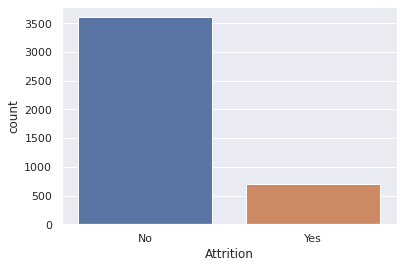

In [539]:
# Schematization of the number of Attrition
sns.set_theme()
sns.countplot(x = "Attrition", data = general_data)
plt.show()

Sur ce graphique nous pouvons observer le départ ou non des employés de l'entreprise, et nous remarquons que le nombre d'attrittion est assez important. 

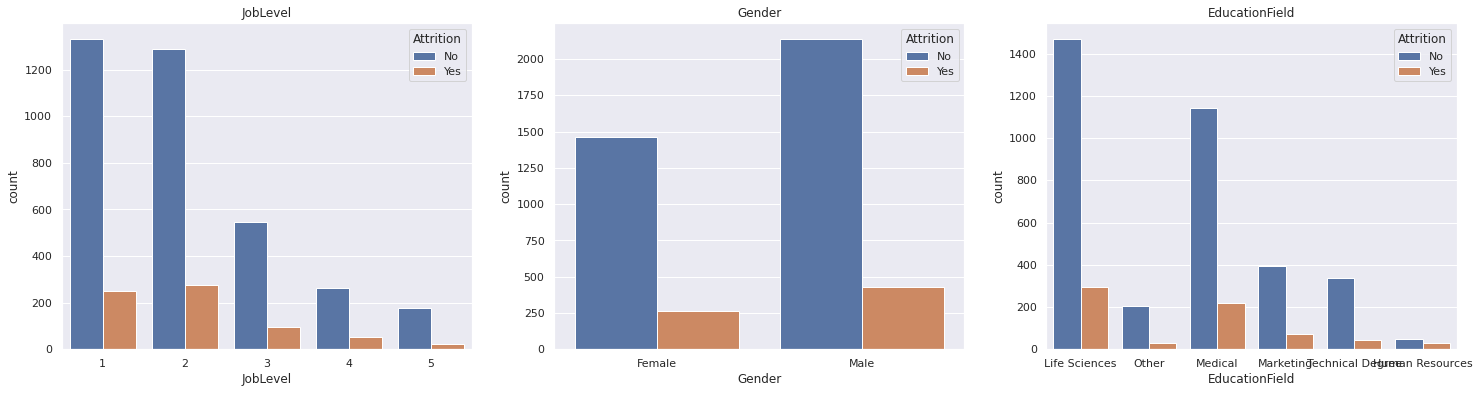

In [540]:
#Analysis of Attrition among some of these groups
plt.figure(figsize=(25,6))

plt.subplot(1,3,1)
sns.countplot(x='JobLevel', hue='Attrition', data=general_data)
plt.title('JobLevel')

plt.subplot(1,3,2)
sns.countplot(x='Gender', hue='Attrition', data=general_data)
plt.title('Gender')

plt.subplot(1,3,3)
sns.countplot(x='EducationField', hue='Attrition', data=general_data)
plt.title('EducationField')

plt.show()

A partir de ce qui précède, nous pouvons nous faire une idée de l'attrition en fonction de certaines caractéristiques, mais nous ne pouvons pas encore déduire lesquelles affectent le plus l'attrition.

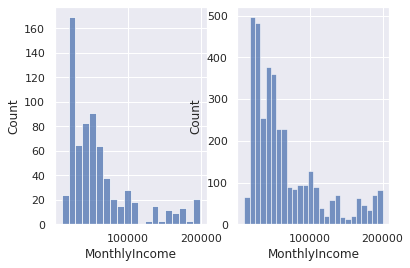

In [541]:
# Representation of the Monthly Income of the salaries who left the company and the Monthly Income of those who stayed
plt.subplot(1,2,1)
sns.histplot(x='MonthlyIncome', data =general_data.loc[general_data["Attrition"] == "Yes"])

plt.subplot(1,2,2)
sns.histplot(x='MonthlyIncome', data=general_data.loc[general_data["Attrition"] == "No"])

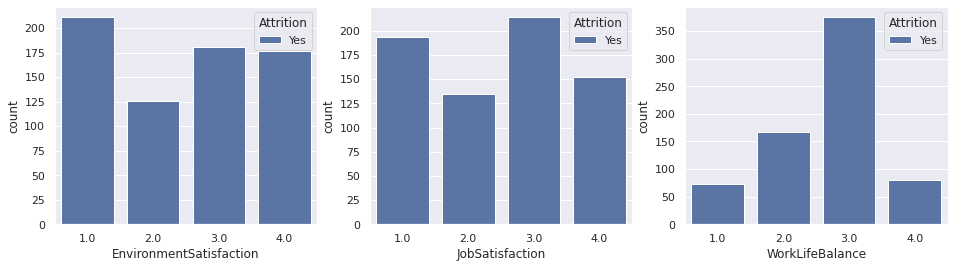

In [542]:
plt.figure(figsize=(16,4))
df = general_data[ general_data["Attrition"] == "Yes"]
plt.subplot(1,3,1)
ax = sns.countplot( x= "EnvironmentSatisfaction", data=df,hue="Attrition")

plt.subplot(1,3,2)
ax = sns.countplot( x= "JobSatisfaction", data=df,hue="Attrition")

plt.subplot(1,3,3)
ax = sns.countplot( x= "WorkLifeBalance", data=df,hue="Attrition")

## 1.6 Encodage

Intéressons nous maintenant aux variables catégorielles. Quand nous développons un modèle de machine learning, il est nécessaire de présenter aux modèles des valeurs numériques avec lesquelles elles puissent faire des calculs. Par conséquent si notre Dataset contient des données qualitatives sous forme de mots, il est alors indispensable de convertir ces données en valeurs numériques. Ce processus s'appelle **l'encodage**.

Il existe deux types d'encodage :

- L'encodage Ordinal
- L'encodage One-Hot

L'encodage Ordinal associe chaque catégorie d'une variable à une valeur décimale unique.

*Chat -> 0 / Chien -> 1 / Lapin -> 2*

L'inconvénient avec ce type d'encodage est que, d'un point de vue arithmétique, ça reviendrait ici à dire qu'un chat est inférieur à un chien qui lui même est inférieur à un lapin ce qui n'a pas de sens. Cette techinque risquerait de tromper toute la suite.

Pour éviter ce problème nous allons utiliser [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) où chaque catégorie est représentée de façon binaire dans une colonne qui lui est propre. Et donc nous retrouverons autant de colonnes que de catégories.

Avec la méthode [`get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), nous réalisons l'encodage One-Hot sur les colonnes que nous souhaitons.


In [543]:
# from sklearn.preprocessing import OneHotEncoder

# onehot_encoder = OneHotEncoder()
# general_data[['Attrition']] = onehot_encoder.fit_transform(general_data[['Attrition']])

# onehot_encoder.categories_

In [544]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

# conversion of qualitative data into numerical data on the "Attrition" column
general_data[['Attrition']] = ordinal_encoder.fit_transform(general_data[['Attrition']])

# making the same process on theses columns
general_data = pd.get_dummies(general_data, columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'])

In [545]:
# show categories that have been encoded
ordinal_encoder.categories_

[array(['No', 'Yes'], dtype=object)]

In [546]:
# show encoding in the Dataset
general_data.head(10)

,Age,Attrition,DistanceFromHome,Education,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,51,0.0,6,2,1,1,131160,1.0,11,0,...,0,0,0,0,0,0,0,0,1,0
1,31,1.0,10,1,2,1,41890,0.0,23,1,...,0,0,0,0,1,0,0,0,0,1
2,32,0.0,17,4,3,4,193280,1.0,15,3,...,0,0,0,0,0,1,0,0,1,0
3,38,0.0,2,5,4,3,83210,3.0,11,3,...,0,0,0,0,0,0,0,0,1,0
4,32,0.0,10,1,5,1,23420,4.0,12,2,...,0,0,0,0,0,1,0,0,0,1
5,46,0.0,8,3,6,4,40710,3.0,13,0,...,0,0,0,1,0,0,0,0,1,0
6,28,1.0,11,2,7,2,58130,2.0,20,1,...,0,0,0,0,0,1,0,0,0,1
7,29,0.0,18,3,8,2,31430,2.0,22,3,...,0,0,0,0,0,1,0,0,1,0
8,31,0.0,1,3,9,3,20440,0.0,21,0,...,1,0,0,0,0,0,0,0,1,0
9,25,0.0,7,4,10,4,134640,1.0,13,1,...,1,0,0,0,0,0,0,1,0,0


Sur cet aperçu, nous remarquons qu'une colonne a été crée pour chaque catégorie distinct que nous avons spécifié dans les paramètres de la fonction d'encodage. Malgré le fait que beaucoup de colonnes soit crées, ça ne pose aucun problème aux modèles de s'entraîner sur ce Dataset.

# 2. CHOIX DU MODÈLE


Avant de commencer la phase d'aprentissage, nous devons choisir entre les deux types suivants : [_modèle de régression ou modèle de classification_](https://fr.gadget-info.com/difference-between-classification#:~:text=Principales%20diff%C3%A9rences%20entre%20la%20classification,qui%20pr%C3%A9dit%20une%20quantit%C3%A9%20continue.).

## 2.1 Régression

La régresion linéaire est un modèle statistique qui va effectuer des fonctions prédictives afin d'en déduire une évolution prévisible dans le temps. Cet algorithme s’appuie sur des valeurs numériques qu'il obtiendra par le biais d’un [_dataset_](https://datascientest.com/dataset-definition#:~:text=Les%20datasets%20(ou%20jeux%20de,images%2C%20vid%C3%A9os%20etc%E2%80%A6).) dataset et il pourra ainsi extrapoler et anticiper les valeurs futures. On utilise ce type de modèle pour les prévisions météorologiques ou encore les études financières et boursières. Dans les modèles de régression, la sortie est continue, c'est à dire que nous attendons un nombre et qui n'est pas compris dans un intervalle.

## 2.2 Classification

La sortie d'un modèle de classification est quant à elle discrète, une valeur qui fait référence à une catégorie. En effet, ce modèle va lui aussi établir des prédictions une fois son entraînement abouti mais va permettre de séparer les données en plusieurs classes qualitatives. Dans la classification, l'appartenance au groupe du problème est identifiée, ce qui signifie que les données sont classées sous différentes étiquettes en fonction de certains paramètres, puis que les étiquettes sont prédites pour les données. La régression prédit des données ordonnées et peut être évaluée en utilisant [_l'erreur quadratique moyenne_](https://fr.wikipedia.org/wiki/Erreur_quadratique_moyenne) tandis que la classification peut recevoir des données non ordonnées et s'évalue avec la [_précision_](https://www.lovelyanalytics.com/2020/05/26/accuracy-recall-precision/).

Nous avons donc choisi la classification car elle nous permet de prédire une valeur dite discrète, une catégorie, dans notre cas Attrition = Yes ou No, alors que la régression permet de prédire des valeurs continues comme des nombres. Nous allons tester les différents algorithmes de classification et calculer pour chacun les scores.

# 3. PHASE D'ENTRAINEMENT

## 3.1 Création d'un jeu de test

En machine learning, il est fortement déconseillé d'évaluer la performance d'un modèle sur les données d'entrainement car ce modèle aura déjà vu ces données auparavant et n'aurait donc pas à appliquer ce qu'il a appris. C'est pour cette raison que nous allons diviser notre Dataset en deux parties : 
- **Train set** sont les données utilisées pour entraîner le modèle (80% des données). On aura alors des tabeaux X_train et y_train qui nous serviront dans la méthode .fit.
- **Test set** réservé uniquement à l'évaluation du modèle (20% des données). On aura cette fois-ci, des tableaux X_test et y_test que l'on utilisera dans la méthode .score.

Pour mettre en oeuvre dans python, on utilise la fonction 'train_test_split' proposée par la bibliothèque de machine learning [`scikit-learn`](https://scikit-learn.org/), elle se chargera de former un train set et un test set de façon aléatoire.

In [547]:
from sklearn.model_selection import train_test_split

# use data of dataset as train and test data for models
y = general_data['Attrition']
X = general_data.drop('Attrition', axis=1)

# create the tables and pass the data x, y in the function
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# 80% for train data
print('Train set:', X_train.shape)
print('Test set:', X_test.shape)

Train set: (3440, 46)
Test set: (860, 46)


On observe ci dessus 80% donc 3440 employés qui feront office de données pour entraîner les modèles et le reste, ici 860 employés pour tester les performances.

Une fois notre train set crée, il est temps de l'utiliser sur les différents modèles afin de les entraîner.

## 3.2 Comparaisons des performances de plusieurs algorithmes
### 3.2.1 Algorithme KNeighborsClassifier
L’algorithme des K plus proches voisins ou [`K-nearest neighbors`](https://realpython.com/knn-python/) est un algorithme de Machine Learning qui appartient à la classe des algorithmes d’apprentissage supervisé.

Pour avoir une idée de la performance future de notre modèle, tester sur les données *Train Set* ne suffira pas, il faut alors également tester sur les données du *Test Set* car ce sont des données jamais vues.

In [548]:
# KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

model_nc = KNeighborsClassifier()
# model training
model_nc.fit(X_train, y_train)
#model.predict(X)
print('Train score:', model_nc.score(X_train, y_train)*100, '%')
print('Test score:', model_nc.score(X_test, y_test)*100, '%')

Train score: 85.29069767441861 %
Test score: 81.16279069767441 %


In [549]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(KNeighborsClassifier(), X_train_scaled, y_train, cv=5, scoring="accuracy").mean()

0.8456395348837209

### 3.2.2 Algorithme Support Vecto Classifier
Cet algorithme fait parti de la famille des Support Vector Machine, qui représente une technique de classification [_supervisée_](https://fr.wikipedia.org/wiki/Apprentissage_supervis%C3%A9) permettant de faire des prédictions sur des variables [_qualitatives_](https://fr.wikipedia.org/wiki/Variable_cat%C3%A9gorielle) ou [_quantitatives_](https://fr.wikipedia.org/wiki/Variable_quantitative).

Le [`SVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)consiste à ramener un problème de classification à un hyperplan dans lequel les données sont séparées en plusieurs classes dont la frontière (données linéairement séparées) est la plus éloignée possible des point de données.
On va donc séparer nos données puis

In [550]:
#SVC
from sklearn.svm import SVC
model_svc = SVC(kernel='rbf', random_state = 42)
model_svc.fit(X_train, y_train)
#model.predict(X)
print('Train score:', model_svc.score(X_train, y_train))
print('Test score:', model_svc.score(X_test, y_test))

Train score: 0.8395348837209302
Test score: 0.8337209302325581


In [551]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(SVC(), X_train_scaled, y_train, cv=5, scoring="accuracy").mean()

0.913953488372093

### 3.2.3 Algorithme Forêt d'arbres décisionnels
Le [`Random Forest`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) est une technique facile à interpréter, stable, qui présente en général de bonnes accuracies et qui peut être utilisée pour des tâches de régression ou de classification. Elle couvre donc une grande partie des problèmes de Machine Learning. 

Sur l’arbre, chaque question correspond à un noeud c’est-à-dire à un endroit où une branche se sépare en deux branches. En fonction de la réponse à chaque question, nous allons nous orienter vers telle ou telle branche de l’arbre pour finalement arriver sur une feuille de l’arbre (ou extrémité) qui contiendra la réponse à notre question.

In [552]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
#n_estimators=44, criterion='gini'
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print('Train score:', model_rf.score(X_train, y_train))
print('Test score:', model_rf.score(X_test, y_test))

Train score: 1.0
Test score: 0.9906976744186047


In [553]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(RandomForestClassifier(), X_train_scaled, y_train, cv=5, scoring="accuracy").mean()

0.9694767441860466

# 4. PHASE DE VALIDATION 

## 4.1 Evaluer les performances du modèle 

### 4.1.1 Validation Set
Le *Validation Set* nous permet de chercher les réglages qui donnent les meilleures performances, tout en gardant de côté les données du *Test Set* pour évaluer la machine sur des données qu'elle n'aura jamais vu.

Pour comparer deux modèles de machine learning, on va commencer par entraîner les deux modèles sur le *Train Set* puis on séléctionnera celui qui à la meilleure performance sur le Validation Set en terminant par évaluer ce modèle sur le *Test Set* afin d'avoir une idée sur sa performance dans la vraie vie.

Il ne faut pas negliger les erreurs possibles sur la découpe de notre Dataset, car en entraînant et en validant les deux modèles sur des portions de données différentes, on pourrait obtenir un tout autre résultat.
 

### 4.1.2 La Cross-validation
Cette [`technique`](https://scikit-learn.org/stable/modules/cross_validation.html) entraîne puis valide note modèle sur plusieurs découpes du *Train Set*. Elle permet de tester toutes les combinaisons possibles pour ensuite faire la moyenne des scores que l'on obtient.

Par exemple, en découpant notre *Train Set* en 10 parties, on peut entraîner notre modèle sur les 9 premières parties puis le valider sur la 10éme partie. Ensuite l'action se répéte pour toutes les configurations possibles. Au final, nous faisons la moyenne des 10 scores obtenus, ce qui nous permettra lorsque nous voudrons comparer deux modèles, de trouver celui, qui à en moyenne eu les meilleures performances.

Il existe plusieurs façons de découper le *Train Set* avec la technique de Cross validation, nous avons choisi d'utiliser la méthode [`StratifiedKFold`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html).

In [554]:
# Adding our model, our data and number of splits of our dataset in the function
#K Fold Cross Validation for KNeighborsClassifier
cross_val_score(estimator=model_nc, X=X_train, y=y_train, cv=10).mean()

0.8191860465116279

In [555]:
#K Fold Cross Validation for svc
cross_val_score(estimator=model_svc, X=X_train, y = y_train, cv = 10).mean()

0.8395348837209303

In [556]:
#K Fold Cross Validation for random forest
cross_val_score(estimator=model_rf, X=X_train, y = y_train, cv = 10).mean()

0.980813953488372

Interprétons notre résultat de façon plus conscise en affichant des courbes.

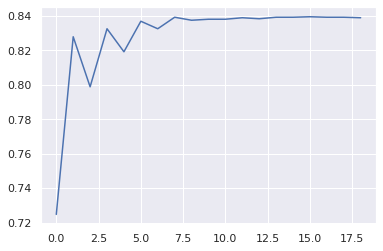

In [557]:
val_score = []
for k in range(1, 20):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=10).mean()
    val_score.append(score)

plt.plot(val_score)

Avec l'algorithme de KNeighbors, on peut très bien voir que le score ne sera pas plus haut que 84 même si on change les hyperparamètres.

Même conclusion pour l'algorithme SVC ci-dessous.

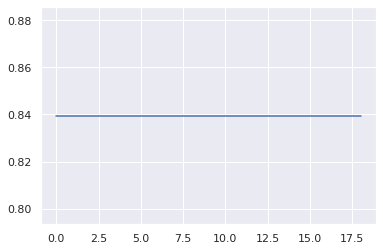

In [558]:
val_score = []
for k in range(1, 20):
    score = cross_val_score(SVC(random_state=k), X_train, y_train, cv=10).mean()
    val_score.append(score)

plt.plot(val_score)

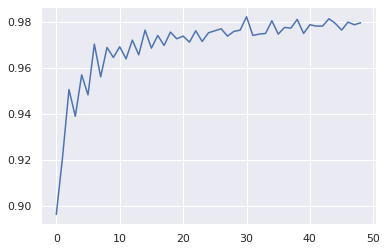

In [559]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(RandomForestClassifier(k), X_train, y_train, cv=10).mean()
    val_score.append(score)

plt.plot(val_score)

Contrairement aux résultats des deux précédents algorithmes, l'algorithme de Random Forest nous paraît être le plus intéressant.

# 5. PHASE D'OPTIMISATION

En tant que Data Scientist, notre travail consiste à améliorer ce modèle pour tenter d'obtenir un score de 91 ou plus. Pour optimiser  les algorithmes, nous allons devoir régler les [_hyperparamétres_](https://fr.wikipedia.org/wiki/Hyperparam%C3%A8tre) de note modèle.

Si on régle notre modèle en optimisant sur le *Test Set*, alors on ne pourra plus utiliser les données du *Test Set* pour faire l'évaluation finale de notre modèle. Pour rappel, pour évaluer un modèle il faut le soumettre à des données qu'il n'a jamais vu. C'est pour cette raison que nous allons découper une troisième section dans notre Dataset que nous allons appeler : le *Validation Set*.

A ce stade de notre progression, notre objectif est de sélectionner les hyperparamètres qui permettent au modèle un meilleur rendu. Comme vu précèdemment la plupart des modèles ont plusieurs hyperparamètres et pour choisir la meilleure combinaison de ces paramètres, nous utiliserons GridSearch, c'est notre prochaine étape.

## 5.1 Réglage des paramètres optimaux à l'aide de Grid Search

Pour résumer, [`Grid SearchCv`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) nous permet de trouver le modèle avec les meilleures hyperparamètres en comparant les différentes performances de chaque combinaison grâce à la technique de Cross validation.

L'algorithme de **Random Forest** nous montre bien dans les résultats obtenus plus haut, qu'il s'agit de la meilleure alternative pour résoudre notre problème avec un score d'environ 0.98. C'est donc uniquement sur celui-ci que nous ferons nos prochaines manipulations.

In [560]:
#Model Tuning for Random Forest
from sklearn.model_selection import GridSearchCV

#creation of a dictionary with the different hyperparameters
parameters = [
               {'n_estimators' : list(range(1, 51)), 'criterion' : ['gini', 'entropy']}
              ]
grid_search = GridSearchCV(estimator=model_rf, param_grid = parameters, scoring = 'accuracy', cv=10)

#train the gird
grid_search = grid_search.fit(X_train, y_train)
#model with the best score / best parameters
best_accuracy = grid_search.best_score_
best_parameter = grid_search.best_params_
print(best_accuracy)
print(best_parameter)

0.9822674418604651
{'criterion': 'gini', 'n_estimators': 44}


Grâce à GridSearch on obtient le modèle qui à obtenu le meilleur score et aussi les meilleurs paramètres de ce modèle qui nous serviront par la suite.
Pour avoir une analyse complète, on teste ce modèle sur les donnèes X_test et y_test afin davoir un aperçu de sa performance dans la vraie vie. 

In [561]:
#evaluate the performance of the model in real life
model = grid_search.best_estimator_
model.score(X_test, y_test)

0.9895348837209302

## 5.2 Procédure d'évaluation
### 5.2.1 Matrice de confusion

La [`Matrice de confusion`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) est l'outil incontournable lorsqu'il s'agit d'étudier les performances d'un système de classification supervisé.

On utilise pour cela le [`cross_val_predict`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_predict.html) qui permet d'obtenir pour chaque plis du jeu d'entraînement, les prédictions obtenues en apprenant sur le reste des données. Cette matrice nous permet de repérer d'une part les différentes erreurs commises par un algorithme de prédiction, mais plus important encore, de connaître les différents types d'erreurs commis.

In [562]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

#run the model with the best parameters
model_rf = RandomForestClassifier(n_estimators=best_parameter['n_estimators'], criterion=best_parameter['criterion'])
model_rf.fit(X_train, y_train)

#RandomForestClassifier matrix
y_train_pred = cross_val_predict(model_rf, X_train, y_train, cv=5)
cm_rf = confusion_matrix(y_train, y_train_pred)
cm_rf

L'image ci-dessous nous permet d'interpréter plus facilement les résultats de la matrice.

![Matrice de confusion](https://miro.medium.com/max/724/1*x6gcMH3jeDj_QUSo8pvl6Q.png)

Dans notre cas le **positif c'est 1** : l'employé est resté et le **négatif correspond au 0** : l'employé n'est pas parti de l'entreprise.

- TP : les employés restent dans l'entreprise l'annnée suivante et le classifieur à prédit qu'ils resteraient.
- TN : les employés partent de l'entreprise l'année suivante et le classifieur à prédit qu'ils partiraient.
- FN : les employés partent mais le classifieur à prédit qu'ils resteraient.
- FP : les employés restent mais le classifieur à prédit qu'ils partiraient.

In [563]:
TP_rf = cm_rf[1,1]
FP_rf = cm_rf[0,1]
TN_rf = cm_rf[0,0]
FN_rf = cm_rf[1,0]

Voici la matrice de confusion que nous obtiendrions si le classifieur était parfait : 

In [564]:
y_train_perfect_pred = y_train
confusion_matrix(y_train, y_train_perfect_pred)

A partir de la matrice de confusion, nous allons pouvoir calculer trois indicateurs utiles pour mesurer les performances d'un modèle.

In [565]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision_score(y_train, y_train_pred)

0.9911894273127754

La [`précision`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html) permet de mesurer le coût des faux positifs, c’est-à-dire ceux détectés par erreur. Si l’on cherche à limiter les faux positifs, c’est cet indicateur que l’on va chercher à minimiser. 

Plus notre résultat se rapproche de 1, plus notre précision est bonne.
Nous avons atteint une precision = 1. Soit l’idéal à atteindre pour ce type de problème.
![](https://i0.wp.com/inside-machinelearning.com/wp-content/uploads/2021/09/precision.png?resize=768%2C121&ssl=1)

In [566]:
precision_score(y_train, y_train_pred) 

0.9911894273127754

Le [`recall_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) met en relation le nombre de vrais positifs et le nombre de faux negatifs. C'est la capacité au classifieur de trouver tous les échantillons positifs.
![](https://cdn-images-1.medium.com/max/800/0*XgGoMQLlGGDgpzYa.png)

In [567]:
recall_score(y_train, y_train_pred)

0.8152173913043478

Nous avons des indicateurs pour estimer l’impact des faux négatifs et faux positifs, mais comment peut-on évaluer globalement notre modèle ?

Le [`f1_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html) combine la précision et le rappel. Il est intéressant et plus intéressant que l’accuracy car le nombre de vrais négatifs (tn) n’est pas pris en compte. 

Dans notre cas, nous avons une majorité de vrais négatifs qui faussent notre perception de la performance de l'algorithme.
![](https://inside-machinelearning.com/wp-content/uploads/2021/09/F1-Score.png)

In [568]:
f1_score(y_train, y_train_pred)

0.8946322067594433

In [569]:
y_scores = cross_val_predict(model_rf, X_train, y_train, cv=5)

In [570]:
y_scores.shape

(3440,)

In [571]:
y_train_pred == (y_scores > 0).all()

# 6. Matrice de corrélation
La matrice de [_corrélation_](https://fr.wikipedia.org/wiki/Corr%C3%A9lation_(statistiques)) permet d'évaluer les dépendences de chaque feature par rapport à d'autres features dans notre fichier `general_data.csv`.

Le résultat montre différents [_coefficients_](https://fr.wikipedia.org/wiki/Coefficient) de corrélation. Plus le coefficient est proche des valeurs extrêmes -1 et 1, plus la corrélation linéaire entre les variables est forte. On les appelle fortement corrélées.

Dans notre cas si il y a une corrélation positive quand on augmente la valeur d'une feature l'autre elle augmente aussi, à l'inverse de la corrélation négative où quand on augmente la valeur d'une feature, la valeur de la feature qui lui correspond baisse.

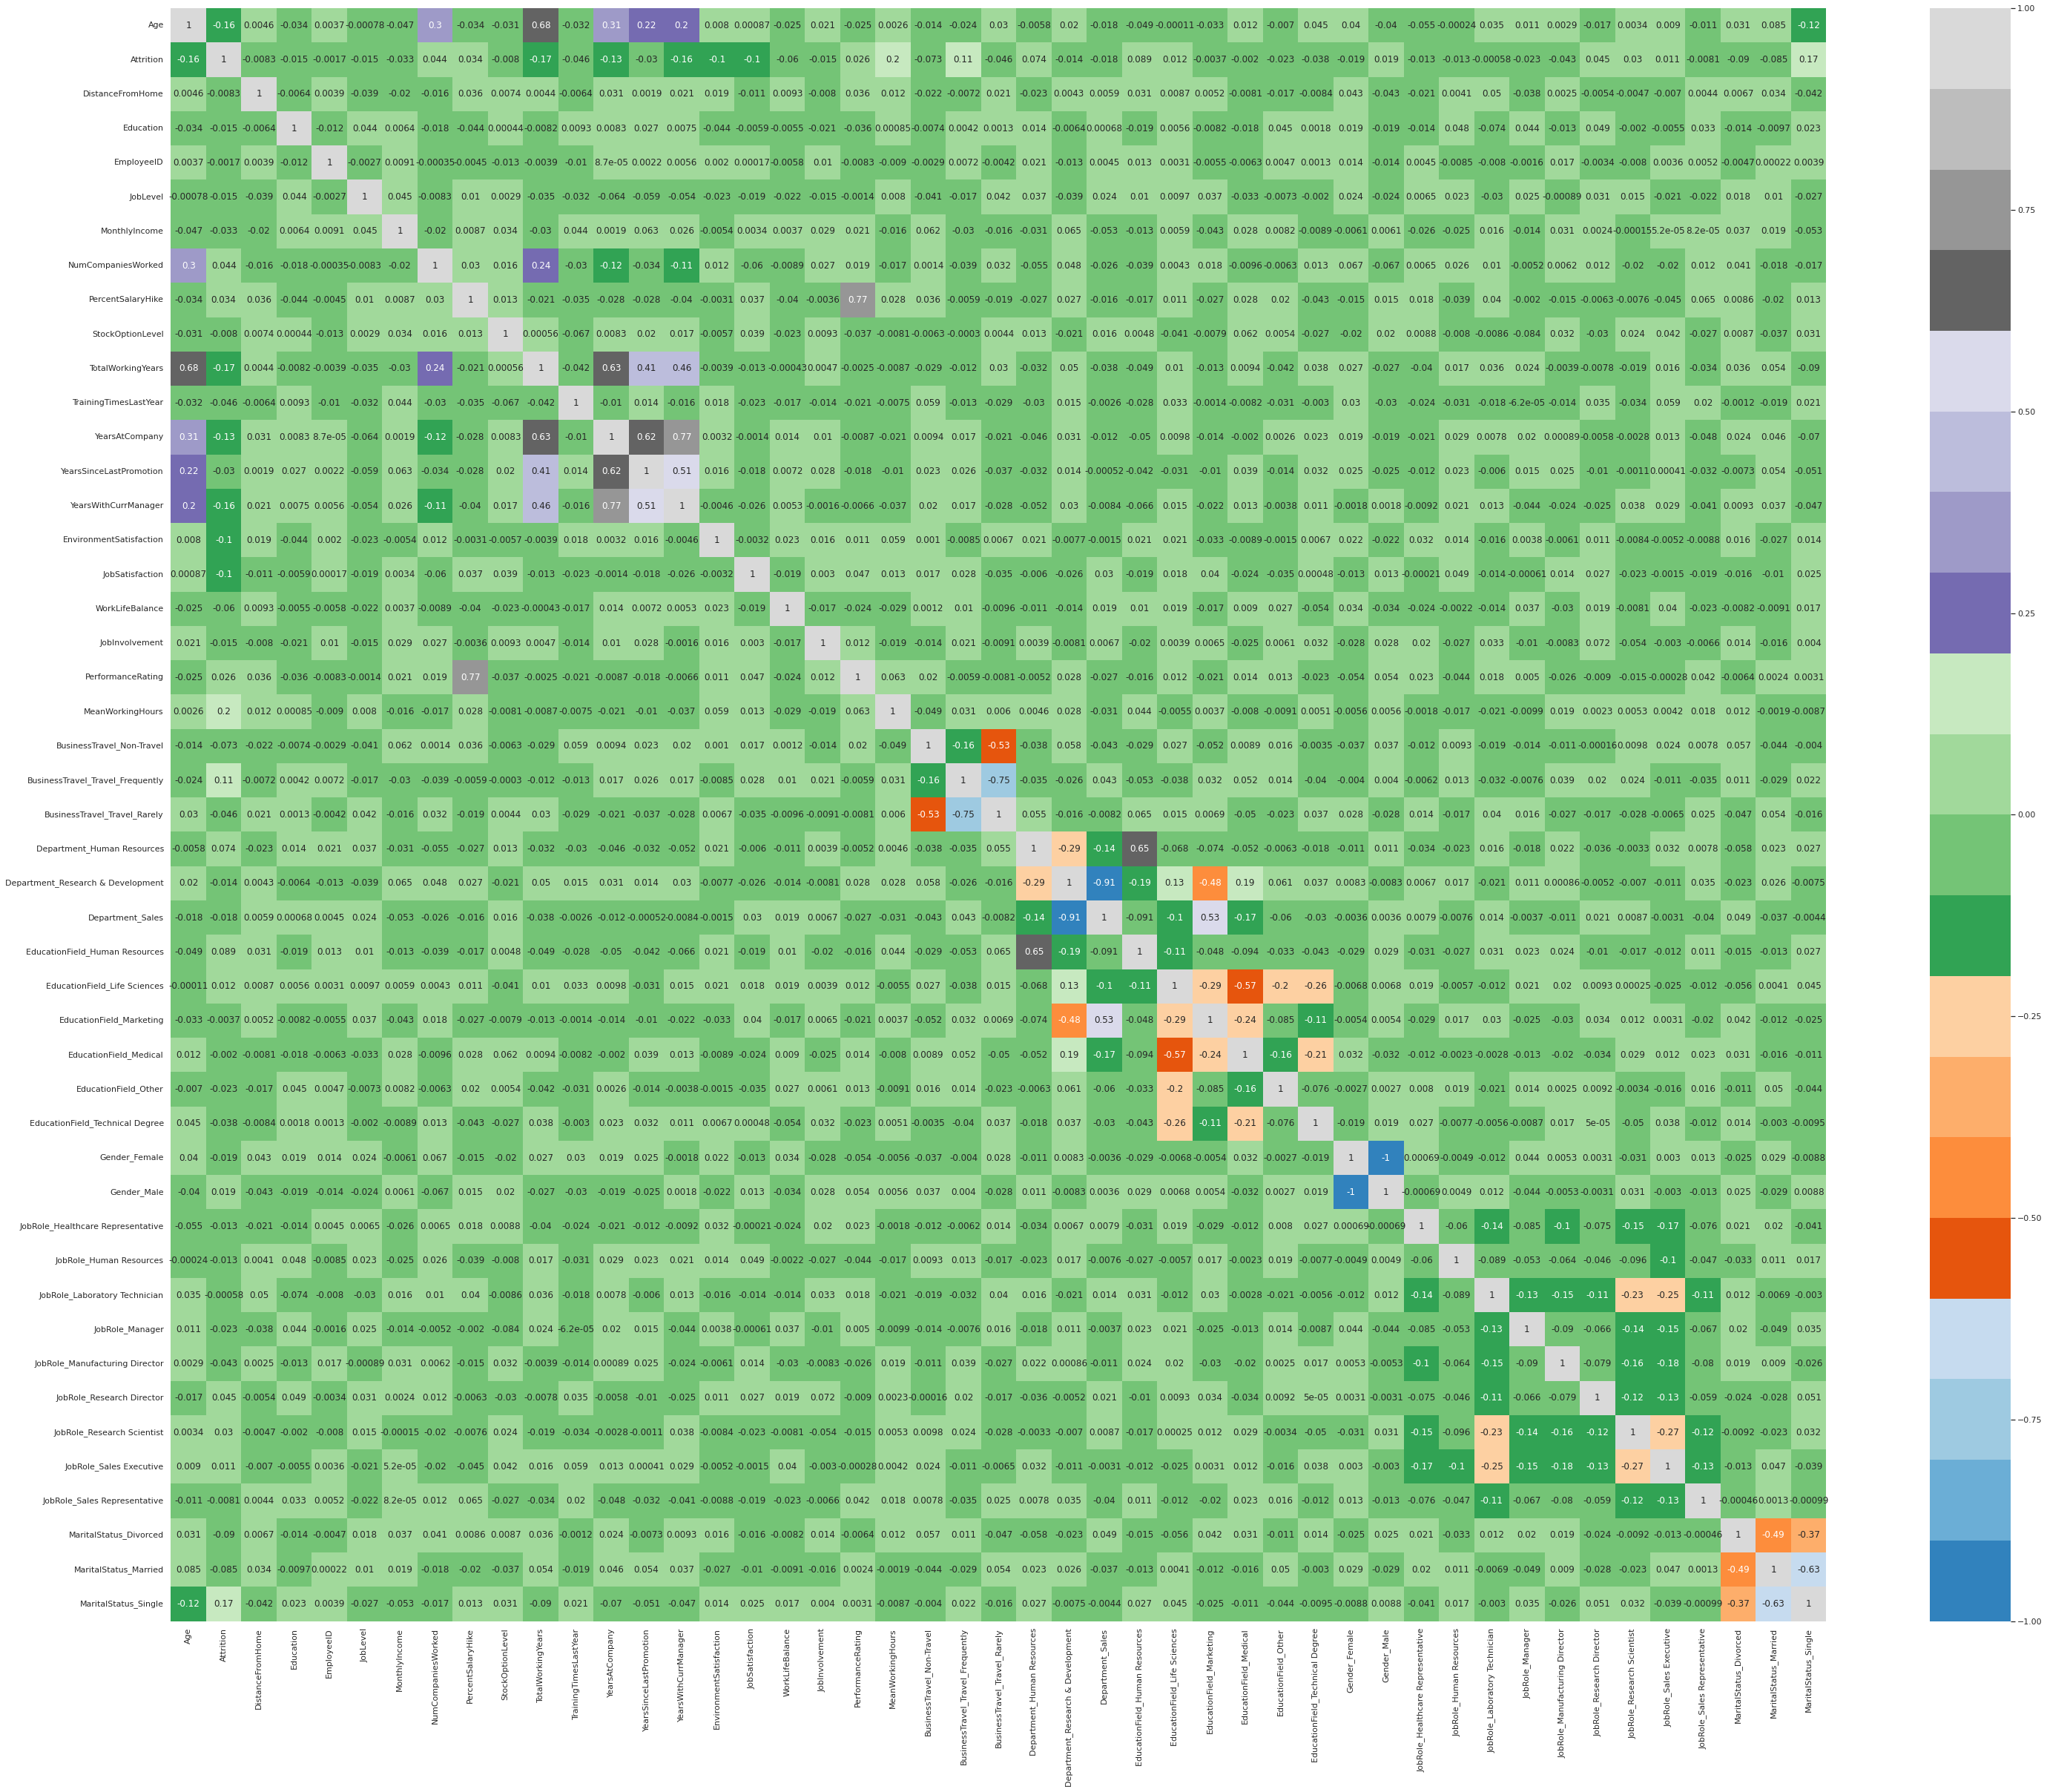

In [585]:
# Let's see the correlation matrix 
plt.figure(figsize = (50,40))   
sns.heatmap(general_data.corr(),annot = True,cmap="tab20c")
plt.savefig('matrix.png')
plt.show()

On affiche le tableau de corrélation par rapport à Attrition pour avoir une meilleure vision ensuite on affiche les valeurs absolues pour tous les coefficients pour voir toutes les corrélations fortes.

In [573]:
serie = general_data.corr()
serie = (serie['Attrition'])
serie = serie.sort_values(ascending = False)
serie

In [574]:
serie = general_data.corr()
serie = abs(serie['Attrition'])
serie = serie.sort_values(ascending = False)
serie

# 7. Solution

La solution de notre projet permet donc à l'aide des prédictions du modèle entraîné de trouver le pourcentage de gens qu'on pourrait sauver en changeant certains paramètres au sein de l'entreprise.

In [591]:
copy_general_data = general_data.copy()
copy_general_data = copy_general_data.drop('Attrition', axis=1)

In [592]:
predictions = model_rf.predict(copy_general_data)
print(predictions)

[0. 1. 0. ... 0. 0. 0.]


On affiche la prédiction du pourcentage de personnes qui restent et qui partent avec le dataset originel. On retrouve environ 15% de personnes parties avec les données non modifiés, ce qui correspond au sujet de notre problème.

In [593]:
from collections import Counter
Counter(predictions)

print("Personnes restées: ", (Counter(predictions)[0] / len(predictions)) * 100, "%")
print("Personnes parties: ", (Counter(predictions)[1] / len(predictions)) * 100, "%")

Personnes restées:  84.0 %
Personnes parties:  16.0 %


## 7.1 Facteurs ayant le plus d'influence

Maintenant avec la copie du dataset originel, on va tenter de changer les valeurs de certaines colonnes où le coefficient de corrélation était assez fort.

On retrouve souvent des coefficients négatifs qui signifient qu'il faut monter la valeur de ces colonnes pour voir l'Attrition diminuer et donc voir de moins en moins de gens partir.

Certaines valeurs ne sont pas changeables comme le fait de rester beaucoup dans une entreprise ou alors éthiquement parlant choisir que des personnes âgées ou les choisir par situation  maritale.

In [595]:
                                                            #ethique 

copy_general_data.at[:, 'BusinessTravel_Non-Travel', ] = 1         #negatif
copy_general_data.at[:, 'BusinessTravel_Travel_Rarely', ] = 0      #negatif
copy_general_data.at[:, 'BusinessTravel_Travel_Frequently', ] = 0
copy_general_data.at[:, 'EnvironmentSatisfaction', ] = 4           #negatif
copy_general_data.at[:, 'MeanWorkingHours', ] = 7                                                            
copy_general_data.at[:, 'JobSatisfaction', ] = 4                   #negatif

#copy_general_data.at[:, 'YearsWithCurrentManager', ] =           #negatif
#copy_general_data.at[:, 'YearsAtCompany', ] =                     #negatif
#copy_general_data.at[:, 'TotalWorkingYears', ] =                  #negatif

                                                        
                                                            #pas ethique

#copy_general_data.at[:, 'MaritalStatus_Married', ] = 0
#copy_general_data.at[:, 'MaritalStatus_Single', ] = 0
#copy_general_data.at[:, 'MaritalStatus_Divorced', ] = 1            #negatif
#copy_general_data.at[:, 'Age', ] = 60 #negatif

In [596]:
predictions = model_rf.predict(copy_general_data)
print(predictions)

[0. 0. 0. ... 0. 0. 0.]


On refait alors les prédictions avec le même modèle entraîné mais cette fois-ci sur la copie du dataset qu'on vient de modifier et on retrouve un gain significatif de personnes qui restent dans l'entreprise.

In [597]:
from collections import Counter
Counter(predictions)

print("Personnes restées après changement: ", (Counter(predictions)[0] / len(predictions)) * 100, "%")
print("Personnes parties après changement: ", (Counter(predictions)[1] / len(predictions)) * 100, "%")

Personnes restées après changement:  96.5813953488372 %
Personnes parties après changement:  3.4186046511627906 %


In [598]:
print("On a gagné: ", 15 - (Counter(predictions)[1] / len(predictions)) * 100, "% de turnover")

On a gagné:  11.581395348837209 % de turnover


On affiche la courbe pour trouver le nombre d'heures optimal sur (l'axe des abscisse) par rapport aux personnes qui restent (axe des ordonnées).

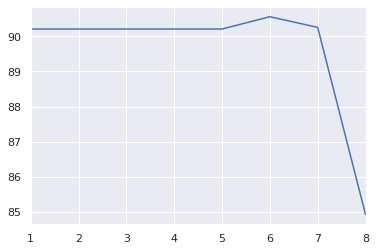

In [604]:
copy_general_data = general_data.copy()
copy_general_data = copy_general_data.drop('Attrition', axis=1)
working_hours = []
for k in range(1, 10):
    copy_general_data.at[:, 'MeanWorkingHours', ] = k-1
    predictions = model_rf.predict(copy_general_data)
    working_hours.append((Counter(predictions)[0] / len(predictions)) * 100)
plt.xlim([1,8])
plt.plot(working_hours)
plt.savefig('hours.png')

## 7.2 Proposition finale 

Augmenter la satisfaction du Job ainsi que de l'environnement, faire voyager les personnes rarement voire pas du tout et baisser juste d'une heure le temps de travail par jour, permettra de gagner environ 11% de turnover et donc garder en tout presque 96% de l'effectif de l'année dernière.

Passer de 8 à 7 heures de travail par jour pour chaque employé permet de gagner environ 5% de turnover d'après les prédictions, ce qui signifie presque la moitié du turnover gagné par rapport au turnover calculé avec tous les paramètres optimaux dans le meilleur des cas. Baisser d'avantage les heures travaillées, nous permettra pas d'avoir un ratio moins élevé de personnes qui partent, donc on a trouvé un compromis optimal temps de travail / ratio départs en baissant juste d'une heure le temps accordé au travail.
